<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-столбцов" data-toc-modified-id="Анализ-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ столбцов</a></span><ul class="toc-item"><li><span><a href="#Анализ-столбца-ceiling_height." data-toc-modified-id="Анализ-столбца-ceiling_height.-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Анализ столбца ceiling_height.</a></span></li><li><span><a href="#Анализ-столбца-floors_total." data-toc-modified-id="Анализ-столбца-floors_total.-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Анализ столбца floors_total.</a></span></li><li><span><a href="#Анализ-столбца-living_area." data-toc-modified-id="Анализ-столбца-living_area.-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Анализ столбца living_area.</a></span></li><li><span><a href="#Анализ-столбца-is_apartment." data-toc-modified-id="Анализ-столбца-is_apartment.-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Анализ столбца is_apartment.</a></span></li><li><span><a href="#Анализ-столбца-kitchen_area." data-toc-modified-id="Анализ-столбца-kitchen_area.-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Анализ столбца kitchen_area.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обработка-пропусков-и-дубликатов" data-toc-modified-id="Обработка-пропусков-и-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков и дубликатов</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

**Производим импорт библиотек** `pandas` и `numpy` для дополнительных инструментов анализа данных.

In [1]:
import pandas as pd
import numpy as np

В переменную `data` **сохраняем данные из csv-файла.**

In [2]:
try:
    data = pd.read_csv('C:/Users/JERR/Desktop/Проекты/Исследовательский анализ данных/real_estate_data.csv', sep='\t')
except:
    try:
        data = pd.read_csv('C:/Users/User/Desktop/Проекты/Исследовательский анализ данных/real_estate_data.csv', sep='\t')
    except:
        data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Отобразим **общую информацию.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Описание столбцов

Видно что столбцы:

* `ceiling_height` - высота потолков, 
* `floors_total` - всего этажей в доме, 
* `living_area` - жилая площадь в квадратных метрах, 
* `is_apartment` - апартаменты,
* `kitchen_area` - площадь кухни в квадратных метрах, 
* `balcony` - число балконов, 
* `locality_name` - locality_name, 
* `airports_nearest` - расстояние до ближайшего аэропорта в метрах, 
* `cityCenters_nearest` - расстояние до центра города, 
* `parks_around3000` - число парков в радиусе 3 км,
* `parks_nearest` - расстояние до ближайшего парка,
* `ponds_around3000` - число водоёмов в радиусе 3 км,
* `ponds_nearest` - расстояние до ближайшего водоёма, 
* `days_exposition` - days_exposition.

**имеют неполные данные.** Поэтому следующим шагом **необходимо провести анализ по столбцам.**

## Предобработка данных

### Анализ столбцов

**Проверяем количество пропусков** в столбцах.

In [4]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Создаем функцию** для вывода **уникальных значений столбцов**, а также подсчета **среднего и стандартного отклонения.**

In [5]:
def unique_value(columns):
    print(data[columns].value_counts())

In [6]:
def mean(columns):
    mean_columns = round(data[columns].mean(), 2)
    print('Среднее: ')
    print(mean_columns)
    return mean_columns

In [7]:
def sigma(columns):
    variance = np.var(data[columns])
    sigma_columns = round(np.sqrt(variance), 2)
    print('Стандартное отклонение: ')
    print(sigma_columns)
    return sigma_columns

#### Анализ столбца ceiling_height.

**Проверяем уникальные значения** столбца `ceiling_height`.

In [8]:
unique_value('ceiling_height')

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64


**Находим среднее значение** столбца `ceiling_height`.

In [9]:
mean_col = mean('ceiling_height')

Среднее: 
2.77


**Находим стандарное отклонение.**

In [10]:
sigma_col = sigma('ceiling_height')

Стандартное отклонение: 
1.26


**Для нормальных распределений верно правило шести стандартных отклонений, или правило трёх сигм.** Оно гласит: практически все значения (около 99%) находятся в промежутке (μ−3σ,μ+3σ).

In [11]:
def bound(mean, sigma):
    lower_bound = round(mean - 3 * sigma, 2)
    print('Нижняя граница нормального распределения:', lower_bound)

    upper_bound = round(mean + 3 * sigma, 2)
    print('Верхняя граница нормального распределения:', upper_bound)
    
bound(mean_col, sigma_col)

Нижняя граница нормального распределения: -1.01
Верхняя граница нормального распределения: 6.55


**Нижняя граница** заходит за положительные значения, поэтому автоматически для столбца `ceiling_height` она **равна нулю**, но **верхняя граница находится на уровне 6.5м**, поэтому можно утверждать что **99% нормальных значений находятся в диапазоне от 0 до 6.5м.**

Избавляемся от выбросов.

In [12]:
data = data.loc[data['ceiling_height'] <= 6.6]

**Проверяем уникальные значения** столбца `ceiling_height`.

In [13]:
unique_value('ceiling_height')

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
3.84       1
3.43       1
4.30       1
3.39       1
3.59       1
Name: ceiling_height, Length: 170, dtype: int64


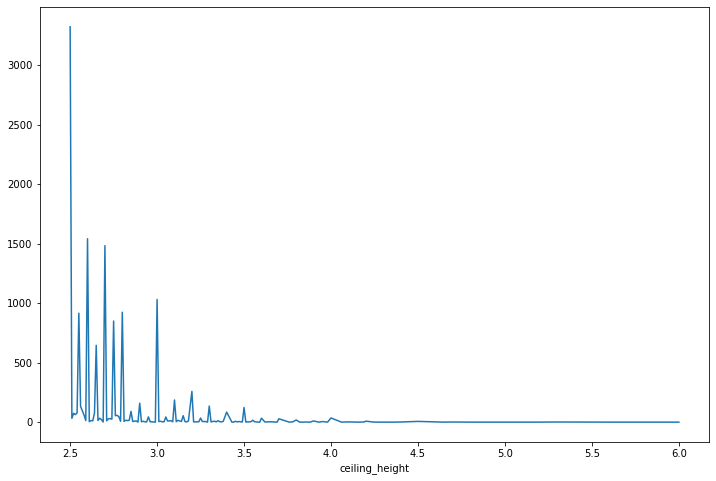

In [96]:
(data
 .groupby('ceiling_height')['ceiling_height']
 .count()
 .plot(figsize=(12, 8)));

**Анализ для столбца** `ceiling_height` **завершен.** Приступаем к следующему столбцу.

#### Анализ столбца floors_total.

**Проверяем уникальные значения** столбца `floors_total`.

In [15]:
unique_value('floors_total')

5.0     3654
9.0     2555
16.0     862
12.0     853
4.0      788
10.0     749
6.0      618
25.0     522
17.0     502
3.0      398
7.0      398
14.0     341
18.0     275
15.0     225
8.0      220
24.0     216
2.0      213
23.0     196
20.0     156
22.0     141
19.0     134
13.0     117
11.0     109
27.0      72
21.0      65
26.0      54
1.0       10
28.0       9
35.0       8
34.0       1
60.0       1
29.0       1
36.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64


Самый высокий жилой дом в Санкт-Петербурге, а соответственно и по всей области, является «Князь Александр Невский» высотой 37 этажей. **Поэтому дома с этажность равной 52 и 60 будет считать выбросами.**

In [16]:
data = data.loc[data['floors_total'] != 52]
data = data.loc[data['floors_total'] != 60]

In [17]:
unique_value('floors_total')

5.0     3654
9.0     2555
16.0     862
12.0     853
4.0      788
10.0     749
6.0      618
25.0     522
17.0     502
3.0      398
7.0      398
14.0     341
18.0     275
15.0     225
8.0      220
24.0     216
2.0      213
23.0     196
20.0     156
22.0     141
19.0     134
13.0     117
11.0     109
27.0      72
21.0      65
26.0      54
1.0       10
28.0       9
35.0       8
34.0       1
29.0       1
36.0       1
37.0       1
Name: floors_total, dtype: int64


**Выбросы удалены.**

#### Анализ столбца living_area.

**Проверяем уникальные значения** столбца `living_area`.

In [18]:
unique_value('living_area')

18.00     490
17.00     370
30.00     361
20.00     300
16.00     262
         ... 
50.81       1
152.00      1
81.60       1
60.80       1
12.60       1
Name: living_area, Length: 1393, dtype: int64


**Выделяется жилая площадь равная 409.7м**, поэтому стоит посмотреть эти данные более детально.

In [19]:
data.query('living_area == 409.70')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


**Данные столбца находятся в хорошем состоянии.**

#### Анализ столбца is_apartment.

**Проверяем уникальные значения** столбца `is_apartment`. 

In [20]:
unique_value('is_apartment')

False    1808
True       41
Name: is_apartment, dtype: int64


**Данные столбца находятся в хорошем состоянии.**

#### Анализ столбца kitchen_area.

**Проверяем уникальные значения** столбца `kitchen_area`. 

In [21]:
unique_value('kitchen_area')

6.00     799
10.00    729
8.00     679
7.00     662
9.00     632
        ... 
9.51       1
5.25       1
42.80      1
33.90      1
13.83      1
Name: kitchen_area, Length: 725, dtype: int64


**Данные столбца находятся в хорошем состоянии.**

#### Вывод

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          14473 non-null  int64  
 1   last_price            14473 non-null  float64
 2   total_area            14473 non-null  float64
 3   first_day_exposition  14473 non-null  object 
 4   rooms                 14473 non-null  int64  
 5   ceiling_height        14473 non-null  float64
 6   floors_total          14464 non-null  float64
 7   living_area           13676 non-null  float64
 8   floor                 14473 non-null  int64  
 9   is_apartment          1849 non-null   object 
 10  studio                14473 non-null  bool   
 11  open_plan             14473 non-null  bool   
 12  kitchen_area          13539 non-null  float64
 13  balcony               7237 non-null   float64
 14  locality_name         14459 non-null  object 
 15  airports_nearest   

In [23]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area               797
floor                       0
is_apartment            12624
studio                      0
open_plan                   0
kitchen_area              934
balcony                  7236
locality_name              14
airports_nearest         2954
cityCenters_nearest      2934
parks_around3000         2933
parks_nearest            9190
ponds_around3000         2933
ponds_nearest            8751
days_exposition          2447
dtype: int64


### Обработка пропусков и дубликатов

**Производим проверку дубликатов** по всему датасету.

In [24]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


**Дубликаты отсутствуют.**

In [25]:
columns = ['floors_total', 'days_exposition', 'living_area', 'kitchen_area']
mean_col = mean(columns)

Среднее: 
floors_total        10.17
days_exposition    190.49
living_area         35.69
kitchen_area        10.57
dtype: float64


In [26]:
data['floors_total'] = data['floors_total'].fillna(mean_col[0])
data['days_exposition'] = data['days_exposition'].fillna(mean_col[1])
data['living_area'] = data['living_area'].fillna(mean_col[2])
data['kitchen_area'] = data['kitchen_area'].fillna(mean_col[3])

**Проверяем пропуски в датасете.**

In [27]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            12624
studio                      0
open_plan                   0
kitchen_area                0
balcony                  7236
locality_name              14
airports_nearest         2954
cityCenters_nearest      2934
parks_around3000         2933
parks_nearest            9190
ponds_around3000         2933
ponds_nearest            8751
days_exposition             0
dtype: int64


Видно, что **некоторые столбцы имеют пропущенные значения**, но сейчас это некритично.

Проверяем общую информацию.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          14473 non-null  int64  
 1   last_price            14473 non-null  float64
 2   total_area            14473 non-null  float64
 3   first_day_exposition  14473 non-null  object 
 4   rooms                 14473 non-null  int64  
 5   ceiling_height        14473 non-null  float64
 6   floors_total          14473 non-null  float64
 7   living_area           14473 non-null  float64
 8   floor                 14473 non-null  int64  
 9   is_apartment          1849 non-null   object 
 10  studio                14473 non-null  bool   
 11  open_plan             14473 non-null  bool   
 12  kitchen_area          14473 non-null  float64
 13  balcony               7237 non-null   float64
 14  locality_name         14459 non-null  object 
 15  airports_nearest   

Видно, что три столбца имеют тип данных object, поэтому необходимо их проверить.

Столбец `locality_name` может иметь неявные дубликаты, поэтому приводим данные к нижнему регистру.

In [29]:
columns = ['locality_name']
def data_lower(col):
    for _ in col:
        data[_] = data[_].str.lower()

data_lower(columns)        
print(data['locality_name'].head(10))

0       санкт-петербург
4       санкт-петербург
9       санкт-петербург
10      санкт-петербург
13             петергоф
16      санкт-петербург
18      санкт-петербург
19      санкт-петербург
20    посёлок парголово
22      деревня кудрово
Name: locality_name, dtype: object


Проверяем количество дубликатов.

In [30]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


В столбце `balcony`есть пропущенные значения, но логично их заменить нулем.

In [31]:
data['balcony'] = data['balcony'].fillna(0)

**Дубликаты отсутствуют.**

Данные столбца `is_apartment` в норме(выше производилась проверка уникальных значений).

Но столбец `first_day_exposition` с неправильным типом данных - необходим временной тип данных.

### Изменение типов данных

Переводим столбец `first_day_exposition` в временной тип.

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Также переводим столбцы `last_price`, `floors_total` и `balcony` в целочисленный тип.

In [33]:
data['last_price'] = data['last_price'].astype('int64')
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['days_exposition'] = data['days_exposition'].astype('int64')

Выводим общую информацию.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14473 non-null  int64         
 1   last_price            14473 non-null  int64         
 2   total_area            14473 non-null  float64       
 3   first_day_exposition  14473 non-null  datetime64[ns]
 4   rooms                 14473 non-null  int64         
 5   ceiling_height        14473 non-null  float64       
 6   floors_total          14473 non-null  int64         
 7   living_area           14473 non-null  float64       
 8   floor                 14473 non-null  int64         
 9   is_apartment          1849 non-null   object        
 10  studio                14473 non-null  bool          
 11  open_plan             14473 non-null  bool          
 12  kitchen_area          14473 non-null  float64       
 13  balcony         

Остались пропущенные значения в некоторых столбцах, но нет данных подходящих на замену.

## Расчёты и добавление результатов в таблицу

Необходимо провести расчеты для того чтобы узнать цену квадратного метра.

In [35]:
data['price'] = data['last_price'] / data['total_area']
data['price'] = data['price'].astype('int')

Добавляем в таблицу информацию: день недели, месяц и год публикации объявления.

In [36]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday 
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Категоризируем данные по этажам.

In [37]:
def str_floor(row): 
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

data['total'] = data.apply(str_floor, axis=1)

Проверяем **количество уникальных значений** столбца `total`.

In [38]:
data['total'].value_counts()

Другой       10568
Последний     2086
Первый        1819
Name: total, dtype: int64

Заметим, что в основе своей продаются квартиры в "середине" дома.

Следующим шагом посчитаем отношение жилой и общей площади, а также отношение площади кухни к общей.

In [39]:
data['ratio_residential_general'] = data['living_area'] / data['total_area']
data['ratio_kitchen_general'] = data['kitchen_area'] / data['total_area']

Выведим общую таблицу.

In [40]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,total,ratio_residential_general,ratio_kitchen_general
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,190,120370,3,3,2019,Другой,0.472222,0.231481
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121,100000,1,6,2018,Другой,0.320000,0.410000
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,0.0,NaN,289,88524,6,2,2017,Другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,2.0,553.0,137,127525,3,11,2017,Другой,0.512626,0.214646
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,...,3.0,298.0,366,82943,5,7,2017,Последний,0.630841,0.121495
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,0.0,NaN,397,81707,3,11,2017,Первый,0.678049,0.109756
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,NaN,...,0.0,NaN,168,104838,4,1,2017,Другой,0.625806,0.180645
19,16,14200000,121.0,2019-01-09,3,2.75,16,76.0,8,NaN,...,0.0,NaN,97,117355,2,1,2019,Другой,0.628099,0.099174
20,12,6120000,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,...,0.0,NaN,74,76500,3,9,2017,Другой,0.600000,0.150000
22,20,5000000,58.0,2017-04-24,2,2.75,25,30.0,15,NaN,...,NaN,NaN,60,86206,0,4,2017,Другой,0.517241,0.189655


Необходимые данные добавлены.

## Исследовательский анализ данных

Необходимо провести анализ по некоторым данным.

In [41]:
import math

In [42]:
def max_min(columns):
    min_ = data[columns].min()
    max_ = data[columns].max()
    return min_, max_

In [43]:
def graph_hist(columns, label, bins):
    print(f'Минимальное значение: {max_min(columns)[0]}')
    print(f'Максимальное значение: {max_min(columns)[1]}')
    data.plot(kind='hist', 
              y=columns, 
              label=label, 
              bins=bins, 
              grid = True,
              figsize=(12, 6));

Минимальное значение: 12.0
Максимальное значение: 900.0


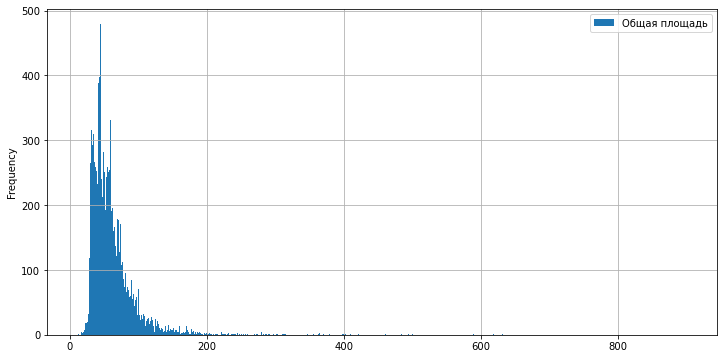

In [44]:
graph_hist("total_area", 'Общая площадь', 900)

Значения в норме.
Следующим шагом изучаем цену за квадратный метр.

Минимальное значение: 111
Максимальное значение: 1736842


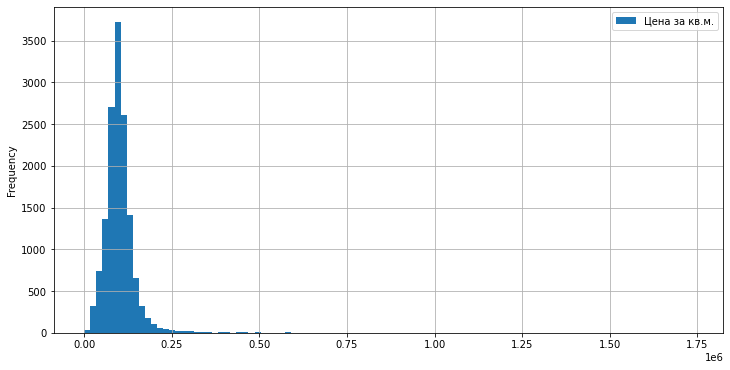

In [45]:
graph_hist("price", 'Цена за кв.м.', 100)

Изучаем общую стоимость квартиры.

Минимальное значение: 12190
Максимальное значение: 420000000


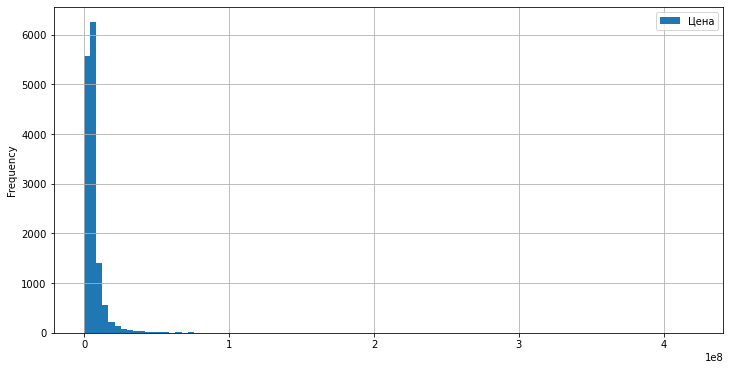

In [46]:
graph_hist("last_price", 'Цена', 100)

Изучаем количество комнат.

Минимальное значение: 0
Максимальное значение: 16


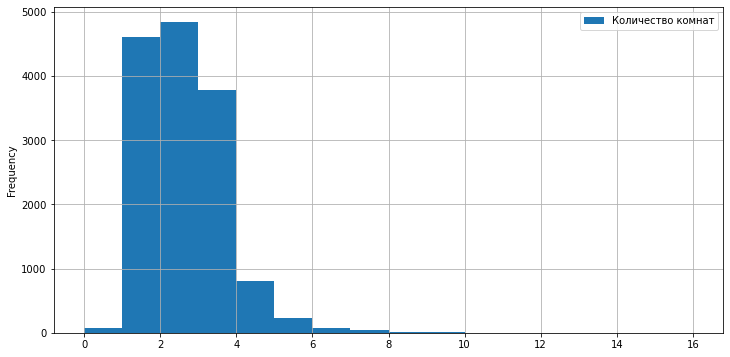

In [47]:
graph_hist("rooms", 'Количество комнат', 16)

Изучаем высоту потолков.

Минимальное значение: 1.0
Максимальное значение: 6.0


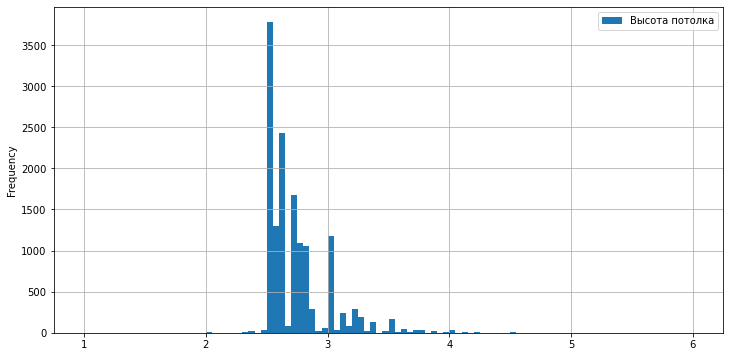

In [48]:
graph_hist("ceiling_height", 'Высота потолка', 100)

Видно, что некоторые значения не соответствуют реальным. Высота потолка не может быть 1м. Поэтому удаляем некорректные значения.

In [49]:
data = data.loc[data['ceiling_height'] >= 2.5]

Минимальное значение: 2.5
Максимальное значение: 6.0


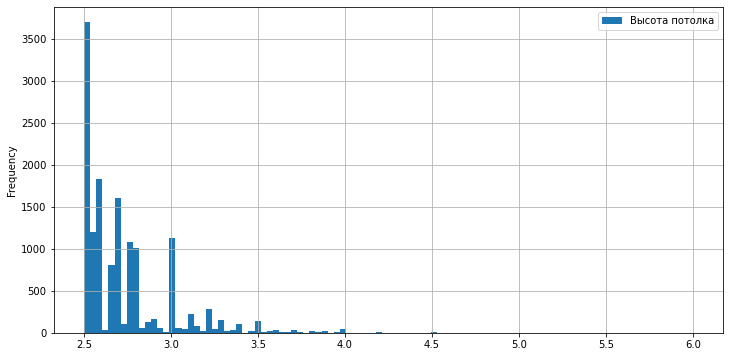

In [50]:
graph_hist("ceiling_height", 'Высота потолка', 100)

Рассмотрим какое количество дней висело объявление.

In [51]:
day_median = data['days_exposition'].median()
day_mean = data['days_exposition'].mean()
print(f'Среднее: {day_mean}.')
print(f'Медиана: {day_median}.')

Среднее: 190.58805555555554.
Медиана: 144.0.


Минимальное значение: 1
Максимальное значение: 1580


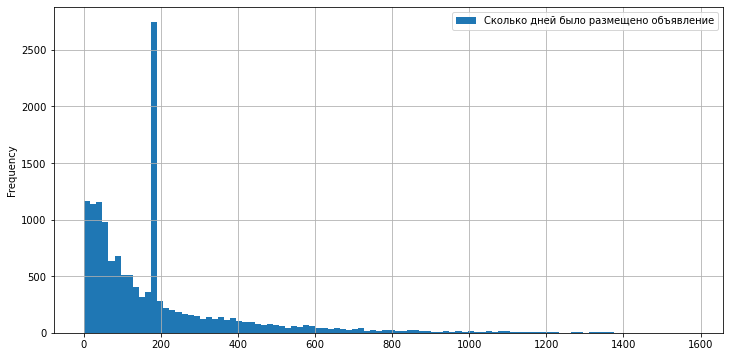

In [52]:
graph_hist("days_exposition", 'Сколько дней было размещено объявление', 100)

In [53]:
sigma_col = sigma('days_exposition')

Стандартное отклонение: 
208.84


In [54]:
bound(day_mean, sigma_col)

Нижняя граница нормального распределения: -435.93
Верхняя граница нормального распределения: 817.11


Убираем невероятно долгие и короткие дни, которые находились в объявлении.

In [55]:
data = data.loc[data['days_exposition'] < 820]
data = data.loc[data['days_exposition'] > 7]

Выводим гистограмму.

Минимальное значение: 8
Максимальное значение: 819


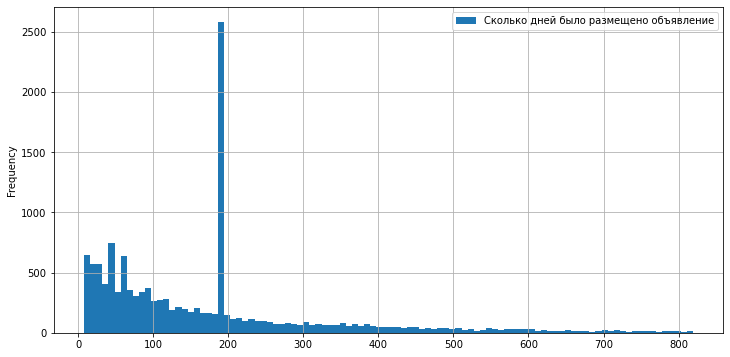

In [56]:
graph_hist("days_exposition", 'Сколько дней было размещено объявление', 100)

По графику видно что большая часть продаж располагается в диапозоне от 7 до 400 дней (примерно, продажи за первый год). Второй год располагается, примерно, от 400 до 750 дней, что составляет малую долю от первого года. Поэтому, если более 750 дней было размещено объявление, то будем считать его невероятно долгим (в сравнении с другими). 
Также длительность объявлений до 7 дней, будем считать невероятно короткими, и скорее всего, выявлена мошенническая схема при продаже квартиры.

**Интересен пик графика, который приходится на среднее значение равное примерно 190 дней.**

Необходимо рассмотрить факторы, которые больше всего влияют на стоимость квартиры. Узнать зависит ли цена от площади, числа комнат, удалённости от центра, а также изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом; от даты размещения: дня недели, месяца и года.

**Рассмотрим диаграмму: цена от общей площади.**

In [57]:
def graph_scatter(x, y):
    data.plot(x=x, 
              y=y, 
              kind='scatter', 
              grid = True,
              figsize=(12, 8));   

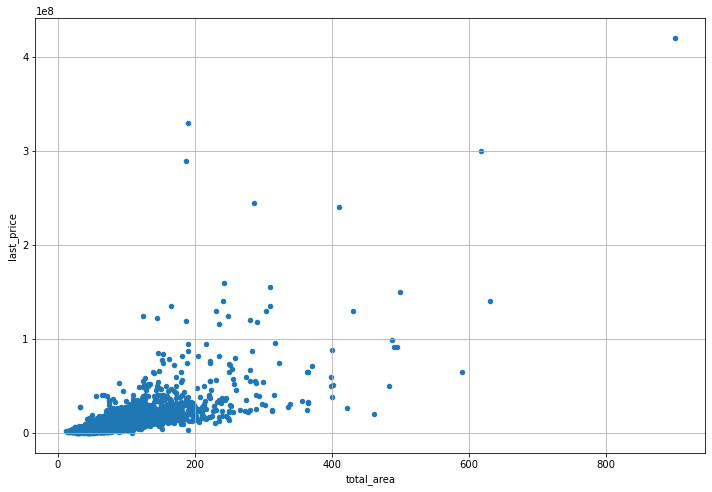

In [58]:
graph_scatter('total_area', 'last_price')

Рассчитаем корреляцию Пирсона.

In [59]:
print('Корреляция Пирсона:',round(data['total_area'].corr(data['last_price']), 2))

Корреляция Пирсона: 0.71


Положительная корреляция говорит о: большая общая площадь стоит дороже. Также наблюдается сильная линейная зависимость.

**Рассмотрим диаграмму: цена от количества комнат.**

In [60]:
def graph_line(index, values, aggfunc):
    return (data
            .pivot_table(index=index, 
                         values=values, 
                         aggfunc=aggfunc)
            .plot(grid=True, 
                  figsize=(12, 8)));  

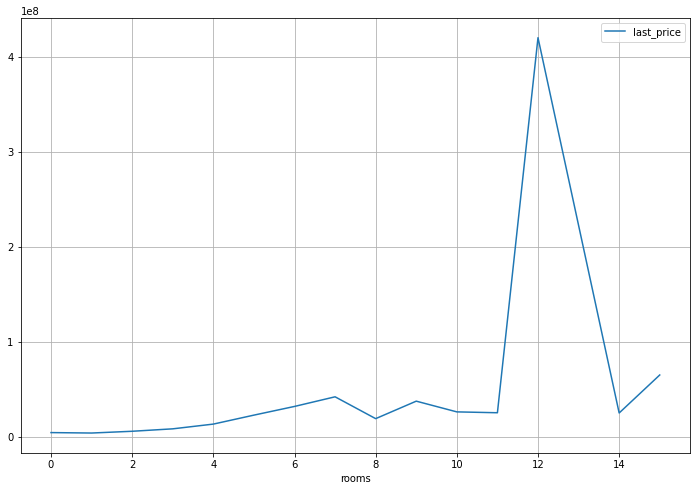

In [61]:
graph_line('rooms', 'last_price', 'mean');

Наиболее дорогие являются квартиры расположенные на 4 этаже. Т.к. количество 5-этажных домов лидирует по количеству объявлений, и люди не охотно берут первый и последний этаж, тогда логика не нарушается. Так же с 2-ого по 7-ой этаж наиболее дорогие квартиры. Но этажность не особо влияет на цену (кроме первого этажа). 

**Рассмотрим диаграмму: цена квартир от удаленности от центра.**

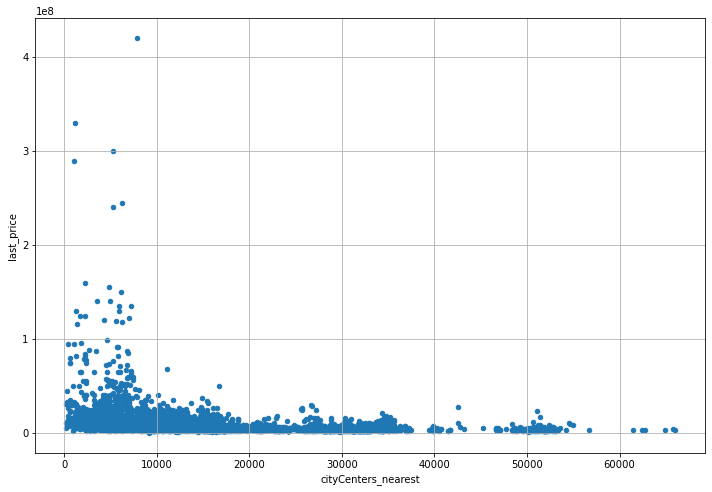

In [62]:
graph_scatter('cityCenters_nearest', 'last_price')

На удалении 0 до 10 км наблюдаются наиболее дорогие квартиры и предварительно можно сказать, что в этом диапозоне лежит центральная зона.

**Рассмотрим диаграмму: цена квартир от группы этажности.**

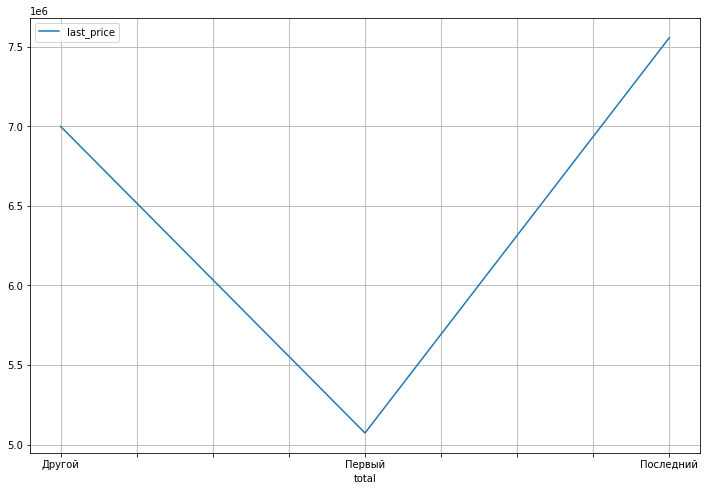

In [63]:
graph_line('total', 'last_price', 'mean');

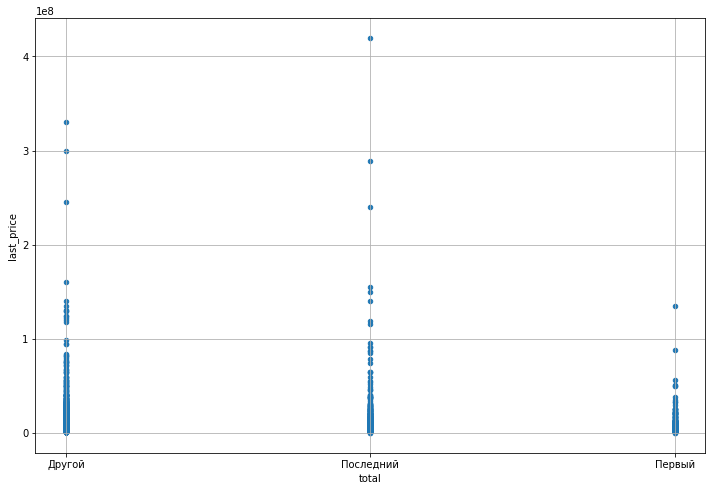

In [64]:
graph_scatter('total', 'last_price')

Первый этаж самый дешевый, в отличии от остальных групп.

**Рассмотрим диаграмму: цена квартир от даты размещения(дня недели).**

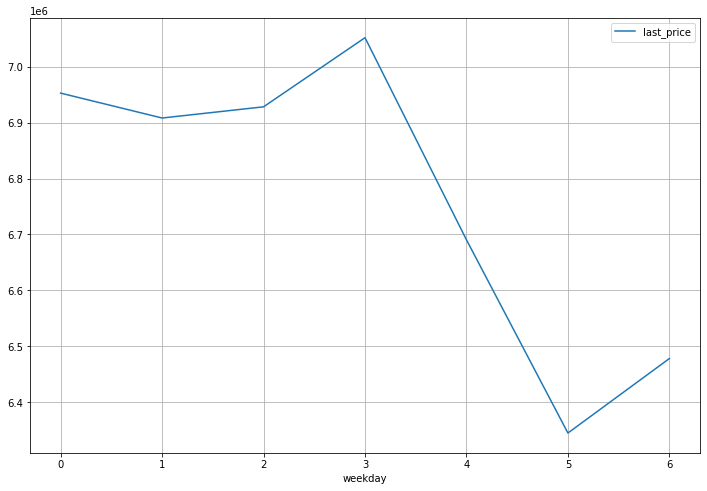

In [65]:
graph_line('weekday', 'last_price', 'mean');

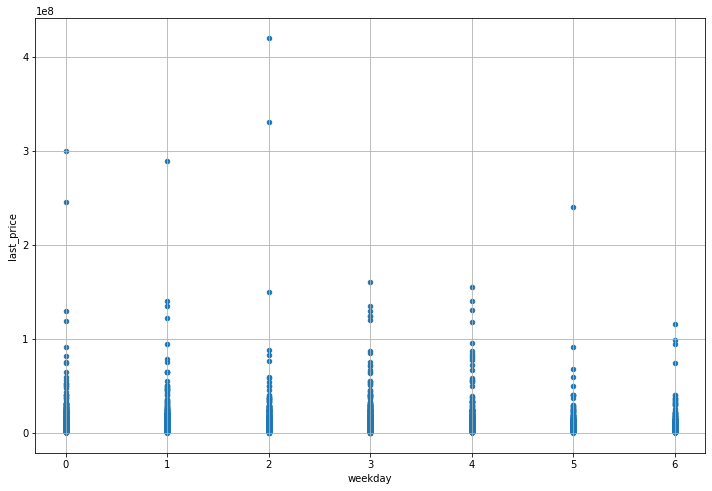

In [66]:
graph_scatter('weekday', 'last_price')

Зависимости от даты размещения(дня недели) не наблюдается.

**Рассмотрим диаграмму: цена квартир от даты размещения(месяца).**

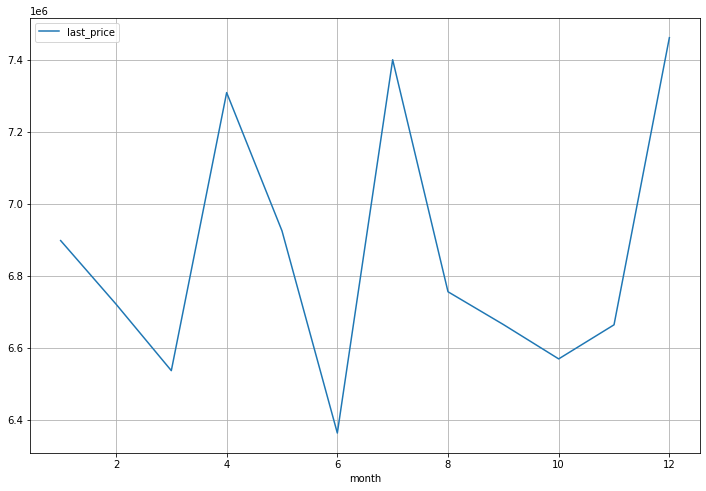

In [67]:
graph_line('month', 'last_price', 'mean');

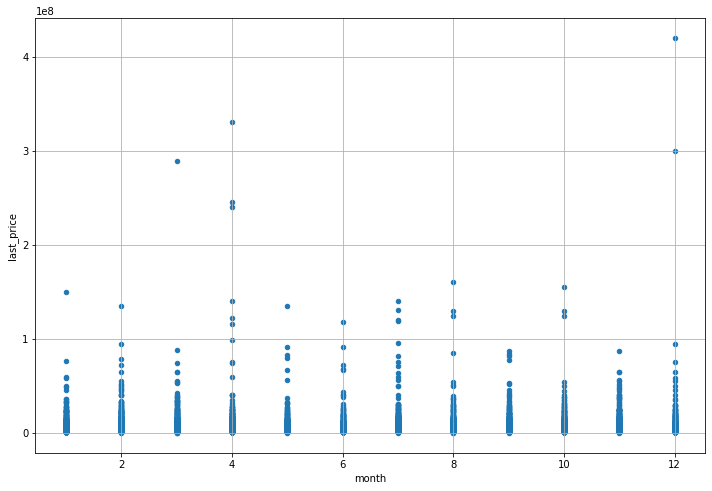

In [68]:
graph_scatter('month', 'last_price')

Зависимости от даты размещения(месяца) не наблюдается.

**Рассмотрим диаграмму: цена квартир от даты размещения(года).**

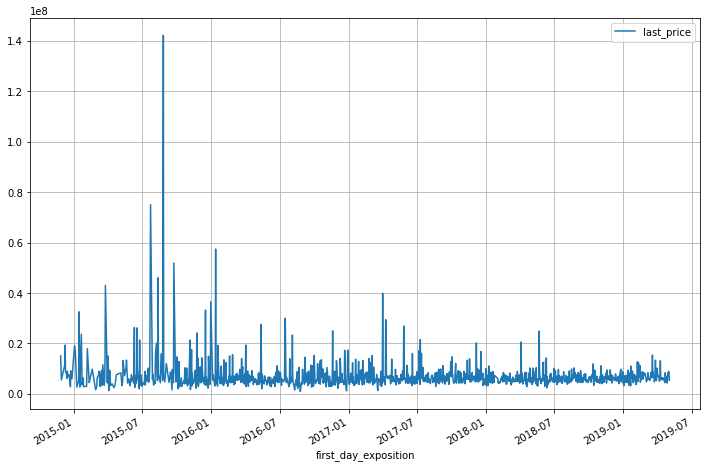

In [69]:
graph_line('first_day_exposition', 'last_price', 'mean');

Наблюдается зависимость от даты размещения(года). Самые дорогие квартиры приходятся на 2015, 2017 и 2018 года.

Следующим шагом выбераем 10 населённых пунктов с наибольшим числом объявлений. 

In [70]:
settlements = (data
               .pivot_table(index='locality_name', 
                            values='last_price', 
                            aggfunc='count')
               .sort_values('last_price', 
                            ascending = False))
display(settlements.head(10))

,last_price
locality_name,
санкт-петербург,9410
всеволожск,258
пушкин,215
посёлок шушары,210
колпино,191
посёлок мурино,183
петергоф,138
гатчина,133
посёлок парголово,126


Считаем цену жилья в этих населённых пунктах и выделяем населённые пункты с самой высокой и низкой стоимостью жилья.

In [71]:
def settlements(values):
    settlements_ = (data
                    .query('locality_name in ["санкт-петербург", "всеволожск", "посёлок шушары", "посёлок мурино", "колпино", "пушкин", "петергоф", "посёлок парголово", "гатчина", "сестрорецк"]')
                    .pivot_table(index='locality_name', values=values, aggfunc = 'mean')
                    .sort_values(values, ascending = False)
                    .astype('int'))
    display(settlements_.head(10))    

In [72]:
settlements('last_price')

,last_price
locality_name,
санкт-петербург,8233544
сестрорецк,6525534
пушкин,6450863
посёлок парголово,4517190
петергоф,4305826
посёлок шушары,4274743
посёлок мурино,3988039
колпино,3962234
всеволожск,3815052


Считаем среднюю цену квадратного метра в этих населённых пунктах;

In [73]:
settlements('price')

,price
locality_name,
санкт-петербург,115822
пушкин,104348
сестрорецк,102924
посёлок парголово,90684
посёлок мурино,87290
петергоф,84853
посёлок шушары,79327
колпино,75972
гатчина,70346


Выясняем, какая область входит в центр. Создаем столбец с расстоянием до центра в километрах: округляем до целых значений.

In [74]:
city = data.query('locality_name in "санкт-петербург"')
data['round_distance'] = round(city['cityCenters_nearest'] / 1000)   

После этого считаем среднюю цену для каждого километра, строим график: он показываем, как цена зависит от удалённости от центра.

In [75]:
def graph_line_centre(index, values, aggfunc):
    (data
        .query('locality_name in "санкт-петербург"')
        .pivot_table(index=index, 
                     values=values, 
                     aggfunc=aggfunc)
        .plot(grid=True, 
              figsize=(12, 8))); 

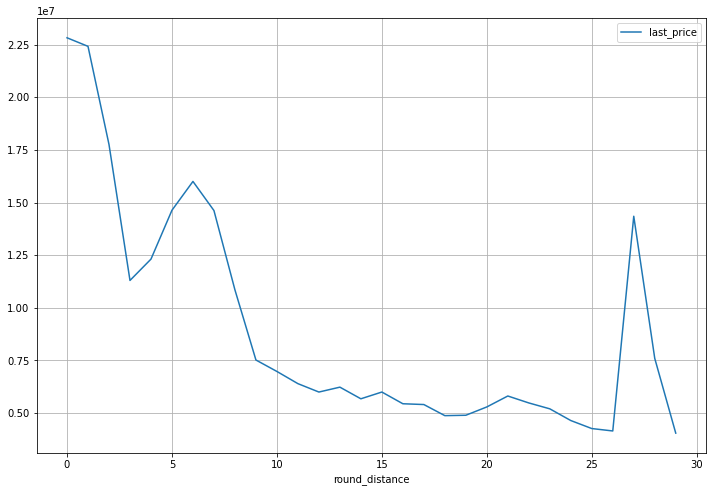

In [76]:
graph_line_centre('round_distance', 'last_price', 'mean')

Выделяем центральную зону по расстоянию. 

In [77]:
def сentre(row): 
    if (row['round_distance'] <= 8) and (row['round_distance'] >= 0):
        return 'Центр'
    return 'Область'

data['сentre'] = data.apply(сentre, axis=1)

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [78]:
def info_centre(index, values, aggfunc):
    return (data
            .query('locality_name in "санкт-петербург"')
            .pivot_table(index=index, 
                         values=values, 
                         aggfunc=aggfunc))
    

In [79]:
city = info_centre('round_distance', 'last_price', 'mean')
city_total_area = info_centre('round_distance', 'total_area', 'mean')
city_rooms = info_centre('round_distance', 'rooms', 'mean')
city_height = info_centre('round_distance', 'ceiling_height', 'mean')

In [80]:
parameter = city.join(city_total_area)
parameter = parameter.join(city_rooms)
parameter = parameter.join(city_height)
display(parameter)

,last_price,total_area,rooms,ceiling_height
round_distance,,,,
0.0,2.282661e+07,113.127778,3.166667,3.438889
1.0,2.241970e+07,106.948682,3.341085,3.224341
2.0,1.775921e+07,103.378218,3.133663,3.224653
3.0,1.130190e+07,92.047130,3.058296,3.168072
4.0,1.231456e+07,92.404361,2.985542,3.115855
5.0,1.463592e+07,97.887269,2.952919,3.101770
6.0,1.600403e+07,94.167130,2.724638,3.003623
7.0,1.462086e+07,79.492610,2.357430,2.904498
8.0,1.085349e+07,77.054189,2.400000,2.852838


Выделяем факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [81]:
def graph_centre(index, values, aggfunc):
    (data
     .query('сentre == "Центр"')
     .pivot_table(index=index, 
                  values=values, 
                  aggfunc=aggfunc)
     .plot(grid=True, 
           figsize=(12, 8)))

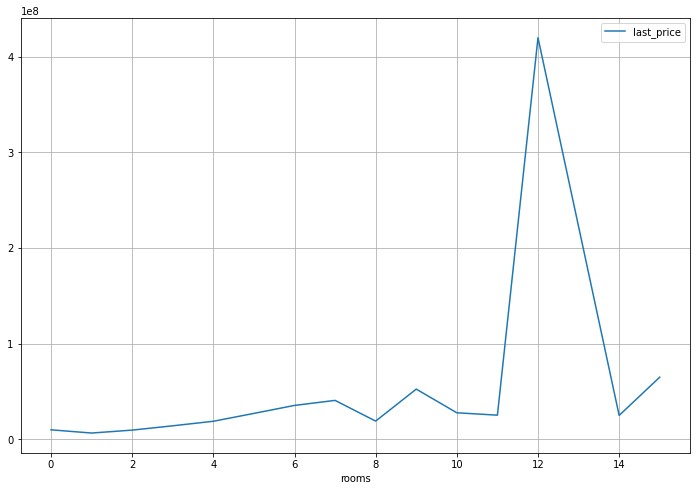

In [82]:
graph_centre('rooms', 'last_price', 'mean')

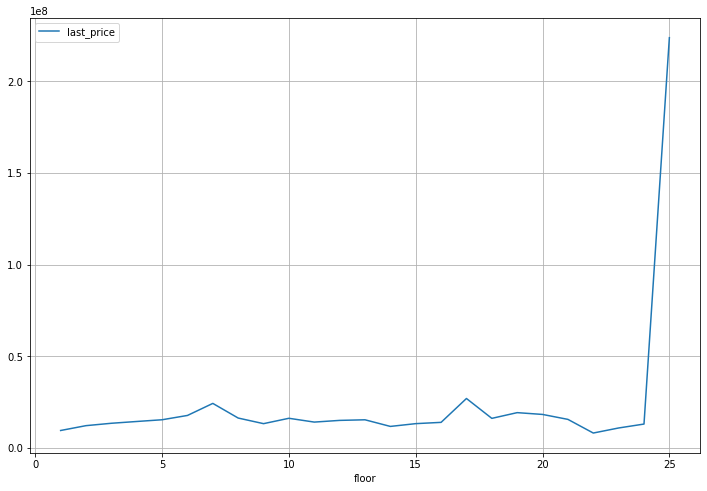

In [83]:
graph_centre('floor', 'last_price', 'mean')

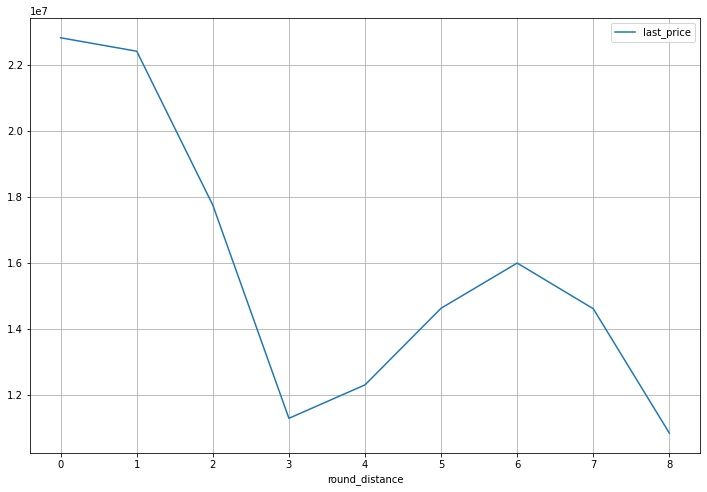

In [84]:
graph_centre('round_distance', 'last_price', 'mean')

Рассчитаем корреляцию Пирсона.

In [85]:
print('Корреляция Пирсона: ', data['round_distance'].corr(data['last_price']))

Корреляция Пирсона:  -0.28739196800921535


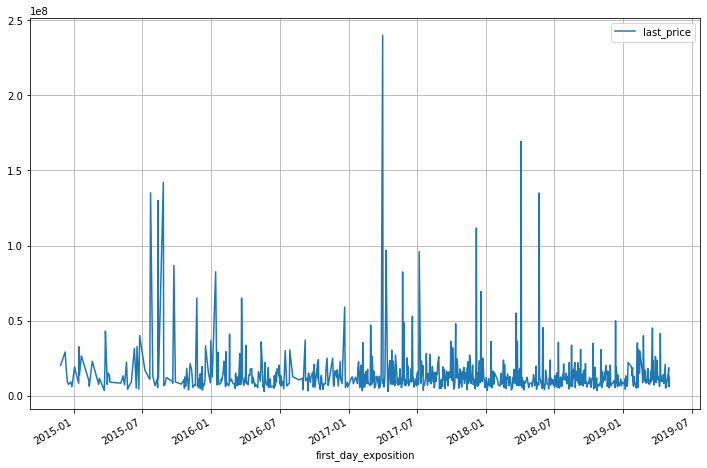

In [86]:
graph_centre('first_day_exposition', 'last_price', 'mean')

### Вывод

Необходимо сравнить весь датафрейм с полученными данными по Санкт-Петербургу.

In [87]:
def graph(index, values, aggfunc, ax):
    (data
     .query('сentre == "Центр"')
     .pivot_table(index=index, values=values, aggfunc=aggfunc)
     .plot(grid=True, ax=ax, alpha=0.5, label='Санкт-Петербург', figsize=(12, 8)));

In [88]:
def general_information(index, values, aggfunc):
    ax = graph_line(index, values, aggfunc)
    graph(index, values, aggfunc, ax)

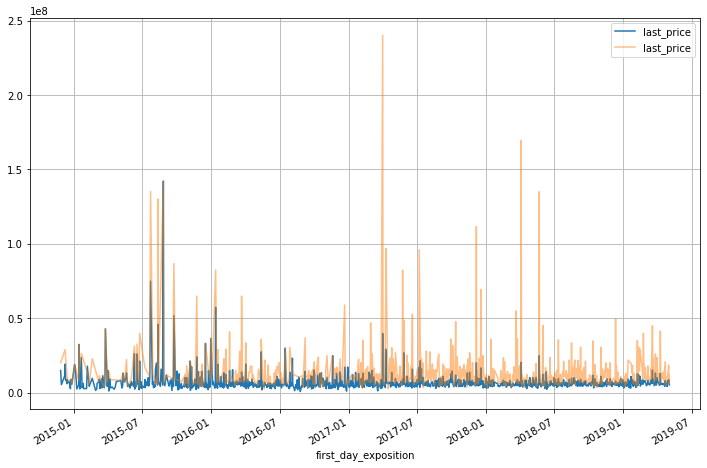

In [89]:
general_information('first_day_exposition', 'last_price', 'mean')

По графикам видно что пик покупок приходился на разные года.

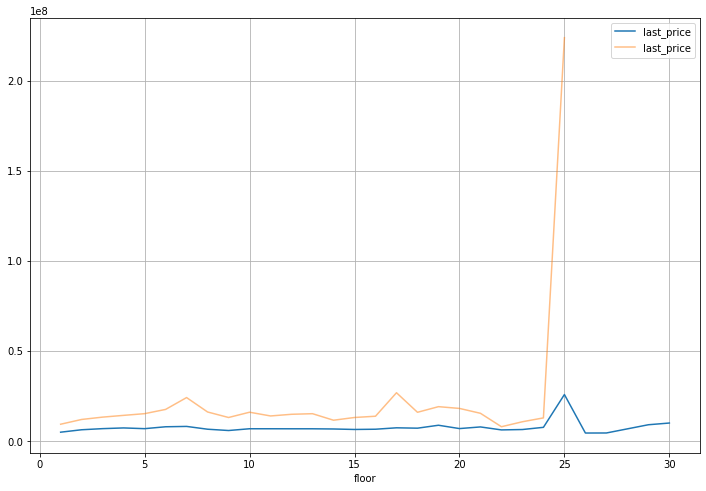

In [90]:
general_information('floor', 'last_price', 'mean')

Видно, что пик приходится на 25-ый этаж, но при этом видна огромная разница в цене.

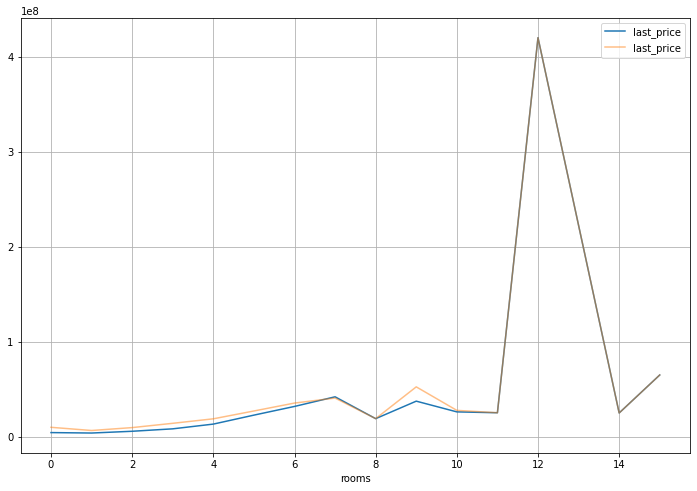

In [91]:
general_information('rooms', 'last_price', 'mean')

В целом информация не отличается по комнатам.

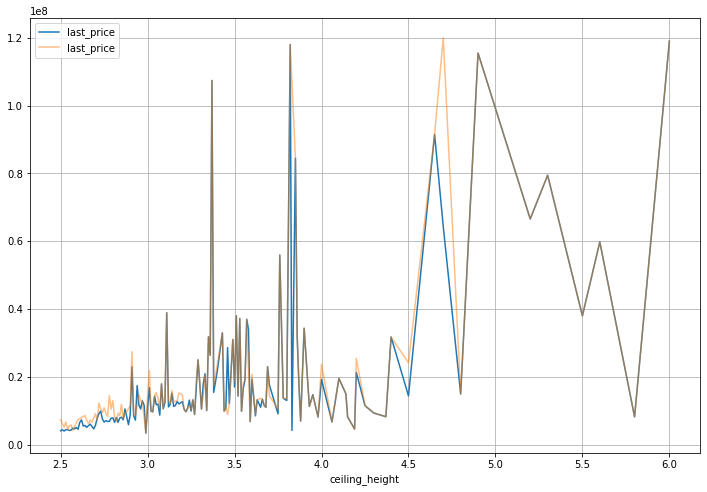

In [92]:
general_information('ceiling_height', 'last_price', 'mean')

В целом информация не отличается по высоте потолков.

<AxesSubplot:xlabel='total_area', ylabel='price'>

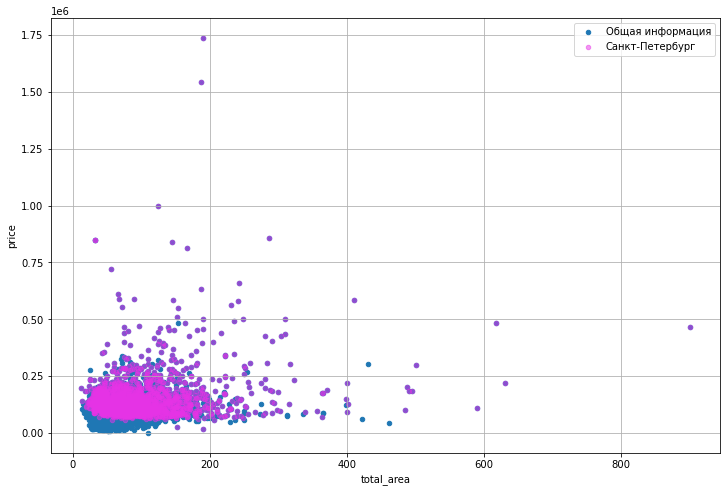

In [93]:
ax = (data
 .plot(x='total_area', 
       y='price', 
       kind='scatter', 
       grid = True, 
       label='Общая информация', 
       figsize=(12, 8)))
(data
 .query('сentre == "Центр"')
 .plot(x='total_area', y='price', kind='scatter', grid = True, ax=ax, alpha=0.5, label='Санкт-Петербург', color = (0.9, 0.2, 0.9) ))

В целом информация не отличается.

## Общий вывод

В данном проекте был изучен исходный файл, выполнена предобработка данных: проанализированы и исправлены столбцы с отсутствующими данными, выполнен поиск дубликатов, в некоторых столбцах изменён тип данных, исправлен формат времени.

В таблицу добавлены дополнительные данные необходимые для анализа такие как: цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры; варианты — первый, последний, другой, соотношение жилой и общей площади, а также отношение площади кухни к общей. Изучено время продажи квартиры. Рассмотрены факторы, которые больше всего влияют на стоимость квартиры. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод